In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)



#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

Using TensorFlow backend.


# **SEQUENTIAL MODEL**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving HR.csv to HR.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HR.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:

df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
df.shape

(14999, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


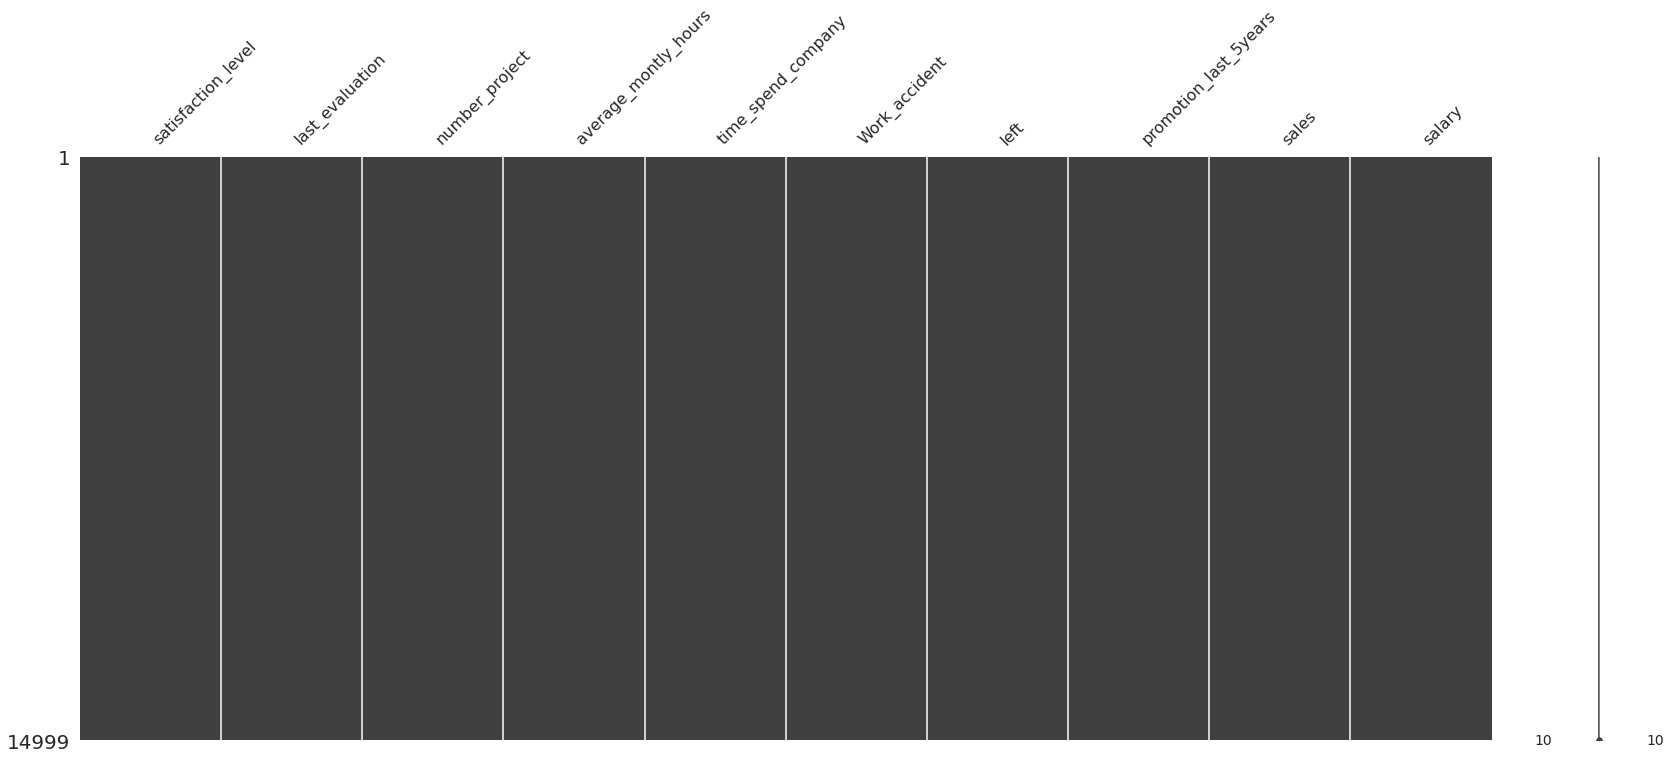

In [10]:
msno.matrix(df)

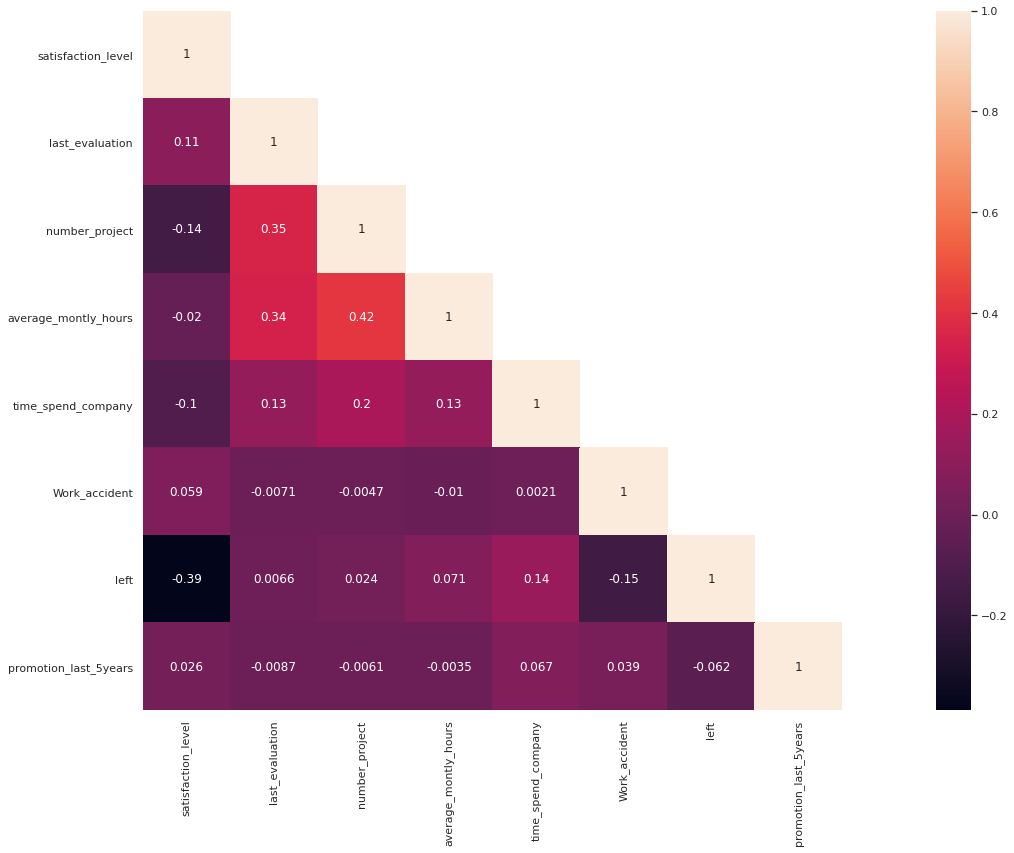

In [11]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [0]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [14]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['sales', 'salary'], dtype='object')

In [15]:
for col in cat_df.columns:
    transform(col)


['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
['high' 'low' 'medium']


In [16]:
df.head() # just to verify.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [18]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [24]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('left',axis=1))
X=scaled_df
Y=df['left'].to_numpy()
Y

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
Y=to_categorical(Y)
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
x_train

array([[-0.93649469,  0.84070693,  1.7824382 , ..., -0.14741182,
         1.09090722,  1.04300352],
       [ 0.67237104,  1.24967285,  0.15978764, ..., -0.14741182,
         0.39372503,  1.04300352],
       [-0.21250511, -0.03564863,  0.97111292, ..., -0.14741182,
         1.09090722,  1.04300352],
       ...,
       [ 0.18971132,  0.08119878,  0.97111292, ..., -0.14741182,
         0.74231612,  1.04300352],
       [ 0.71259269,  1.65863878,  0.15978764, ..., -0.14741182,
         0.39372503, -0.55495458],
       [ 1.47680391,  0.84070693, -1.46286291, ..., -0.14741182,
         0.39372503, -0.55495458]])

In [0]:
np.random.seed(42)


In [0]:
rn.seed(42)

In [0]:
tf.random.set_seed(42)

In [0]:
model=Sequential()
model.add(Dense(input_dim=9,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [0]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [45]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Train on 11249 samples, validate on 3750 samples
Epoch 1/10
11249/11249 [==============================] - 1s 68us/step - loss: 0.2269 - accuracy: 0.9177 - val_loss: 0.1695 - val_accuracy: 0.9556
Epoch 2/10
11249/11249 [==============================] - 0s 41us/step - loss: 0.1511 - accuracy: 0.9569 - val_loss: 0.1629 - val_accuracy: 0.9620
Epoch 3/10
11249/11249 [==============================] - 0s 41us/step - loss: 0.1361 - accuracy: 0.9609 - val_loss: 0.1461 - val_accuracy: 0.9633
Epoch 4/10
11249/11249 [==============================] - 0s 44us/step - loss: 0.1284 - accuracy: 0.9645 - val_loss: 0.1428 - val_accuracy: 0.9637
Epoch 5/10
11249/11249 [==============================] - 1s 47us/step - loss: 0.1236 - accuracy: 0.9634 - val_loss: 0.1343 - val_accuracy: 0.9635
Epoch 6/10
11249/11249 [==============================] - 0s 41us/step - loss: 0.1181 - accuracy: 0.9662 - val_loss: 0.1355 - val_accuracy: 0.9625
Epoch 7/10
11249/11249 [==============================] - 0s 42us/ste

In [46]:
model.predict_classes(x_test)


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
model.predict(x_test)

array([[9.8851168e-01, 1.2367040e-02],
       [9.9988943e-01, 1.1341830e-04],
       [9.9228621e-01, 8.4252357e-03],
       ...,
       [9.9705958e-01, 2.8886795e-03],
       [9.8202789e-01, 1.8326014e-02],
       [9.8610896e-01, 1.4643846e-02]], dtype=float32)

In [57]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.968, Test: 0.964


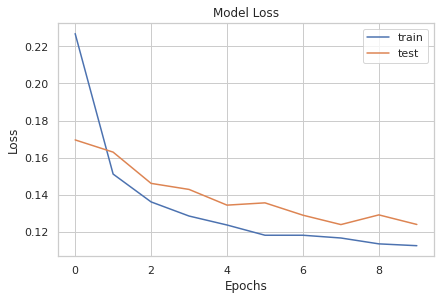

In [49]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

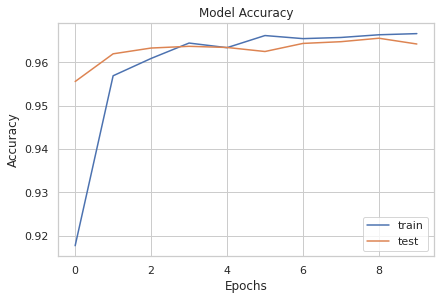

In [53]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **MLP CLASSIFIER**

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
y = df['left']
x = df.drop(['left'], axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [90]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 1.40556585
Iteration 2, loss = 0.57553566
Iteration 3, loss = 0.57098310
Iteration 4, loss = 0.56537272
Iteration 5, loss = 0.56565888
Iteration 6, loss = 0.56448373
Iteration 7, loss = 0.56294147
Iteration 8, loss = 0.56024856
Iteration 9, loss = 0.56006033
Iteration 10, loss = 0.55888677
Iteration 11, loss = 0.55653749
Iteration 12, loss = 0.55575633
Iteration 13, loss = 0.55477881
Iteration 14, loss = 0.55430429
Iteration 15, loss = 0.55304151
Iteration 16, loss = 0.55198265
Iteration 17, loss = 0.55307083
Iteration 18, loss = 0.55308479
Iteration 19, loss = 0.55270814
Iteration 20, loss = 0.54874772
Iteration 21, loss = 0.54748969
Iteration 22, loss = 0.54848762
Iteration 23, loss = 0.54446496
Iteration 24, loss = 0.55665123
Iteration 25, loss = 0.55316837
Iteration 26, loss = 0.55004183
Iteration 27, loss = 0.55116072
Iteration 28, loss = 0.55144523
Iteration 29, loss = 0.54694897
Iteration 30, loss = 0.54324540
Iteration 31, loss = 0.54414597
Iteration 32, los

In [91]:
accuracy_score(y_test, y_pred)

0.7776

In [92]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2916,    0],
       [ 834,    0]])

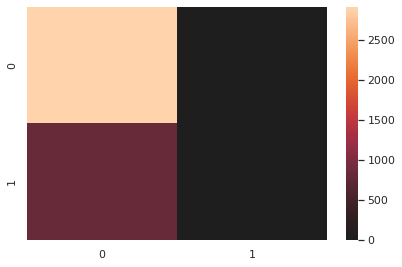

In [93]:
sns.heatmap(cm, center=True)
plt.show()

# **LSTM**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy

In [0]:
numpy.random.seed(7)

In [104]:
top_words = 5000
embedding_vecor_length = 32
max_review_length = 9
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 9, 32)             160000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
11249/11249 [==============================] - 3s 278us/step - loss: 0.4432 - accuracy: 0.7934
Epoch 2/3
11249/11249 [==============================] - 3s 241us/step - loss: 0.2597 - accuracy: 0.8936
Epoch 3/3
11249/11249 [==============================] - 3s 239us/step - loss: 0.1992 - accuracy: 0.9278
Accuracy: 93.31%


# **LSTM AND CNN**

In [106]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000

max_review_length = 9

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 9, 32)             160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 32)             3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
11249/11249 [==============================] - 2s 194us/step - loss: 0.3605 - accuracy: 0.8444
Epo

## LSTM WITH A DROP OUT LAYER

In [107]:
from keras.layers import Dropout

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 9, 32)             160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 32)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
11249/11249 [==============================] - 3s 283us/step - loss: 0.4602 - accuracy: 0.7836
Epo

# **GRU**

In [121]:
from keras.layers import GRU
# The GRU architecture
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 9, 32)             160000    
_________________________________________________________________
gru_18 (GRU)                 (None, 50)                12450     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 172,501
Trainable params: 172,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
11249/11249 [==============================] - 2s 196us/step - loss: 0.5182 - accuracy: 0.7647
Epoch 2/3
11249/11249 [==============================] - 2s 161us/step - loss: 0.3452 - accuracy: 0.8340
Epoch 3/3
11249/11249 [=======